In [1]:
# Multinomial naive bayes
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
bow_df = pd.read_csv("bow.csv")
tfidf_df = pd.read_csv("tfidf.csv")
trigram_df = pd.read_csv("trigram.csv")

In [3]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(bow_df.iloc[:,:-1], bow_df.iloc[:,-1], test_size=0.2, random_state=42)
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_df.iloc[:,:-1], tfidf_df.iloc[:,-1], test_size=0.2, random_state=42)
x_train_trigram, x_test_trigram, y_train_trigram, y_test_trigram = train_test_split(trigram_df.iloc[:,:-1], trigram_df.iloc[:,-1], test_size=0.2, random_state=42)

x_train = [x_train_bow, x_train_tfidf, x_train_trigram]
x_test = [x_test_bow, x_test_tfidf, x_test_trigram]
y_train = [y_train_bow, y_train_tfidf, y_train_trigram]
y_test = [y_test_bow, y_test_tfidf, y_test_trigram]
feature_names = ["BOW", "TF-IDF", "Trigram"]

In [7]:
gs_per_feature = []

for i in range(3):
  gs_logreg = GridSearchCV(LogisticRegression(max_iter=100), param_grid={'penalty': ['l1', 'l2'], 'solver': ["lbfgs", "liblinear"],
                                                                  "C": [1.0, 10] }, cv=5, scoring="f1")
  gs_logreg.fit(x_train[i], y_train[i])
  gs_per_feature.append(gs_logreg)
  print(feature_names[i])
  print("Best params:", gs_logreg.best_params_)
  print("Best score:", gs_logreg.best_score_, "\n")

BOW
Best params: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.8462353120734212 

TF-IDF
Best params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.84672283709795 

Trigram
Best params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.8021175741501771 



In [8]:
y_pred_test = []
for i in range(3):
  print("\t\t\t" + feature_names[i])
  logreg = LogisticRegression(solver=gs_per_feature[i].best_params_['solver'], penalty=gs_per_feature[i].best_params_['penalty'], C=gs_per_feature[i].best_params_['C'])
  logreg.fit(x_train[i], y_train[i])
  y_pred_train = logreg.predict(x_train[i])
  y_pred_test.append(logreg.predict(x_test[i]))
  print("Train report:\n", classification_report(y_train[i], y_pred_train))
  print("Test report:\n", classification_report(y_test[i], y_pred_test[i]) + "\n")

			BOW
Train report:
               precision    recall  f1-score   support

          -1       0.95      0.88      0.92      2173
           1       0.94      0.98      0.96      4033

    accuracy                           0.94      6206
   macro avg       0.95      0.93      0.94      6206
weighted avg       0.94      0.94      0.94      6206

Test report:
               precision    recall  f1-score   support

          -1       0.75      0.63      0.69       537
           1       0.82      0.89      0.85      1015

    accuracy                           0.80      1552
   macro avg       0.79      0.76      0.77      1552
weighted avg       0.80      0.80      0.80      1552


			TF-IDF
Train report:
               precision    recall  f1-score   support

          -1       0.96      0.94      0.95      2173
           1       0.97      0.98      0.97      4033

    accuracy                           0.96      6206
   macro avg       0.96      0.96      0.96      6206
weighted avg

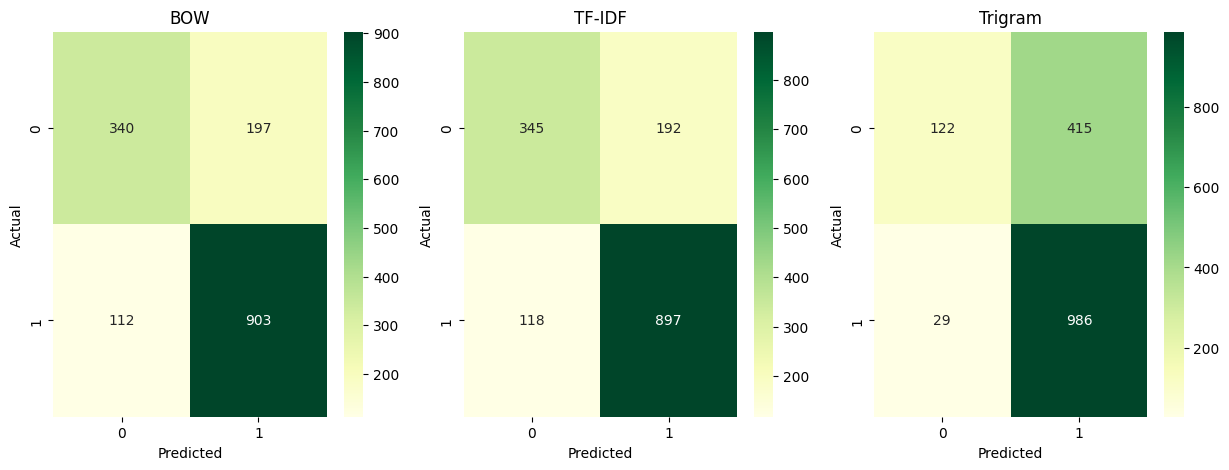

In [9]:
fig, axes =  plt.subplots(1,3,sharex=True,squeeze=False, figsize=(15, 5))

for i in range(3):
  sns.heatmap((confusion_matrix(y_test[i],y_pred_test[i])),annot=True,fmt='.5g',cmap="YlGn",ax=axes[0][i]);
  axes[0][i].set_title(feature_names[i])
  axes[0][i].set_xlabel("Predicted")
  axes[0][i].set_ylabel("Actual")